# Do it Pandas 공부
## Date : 2020-09-29_ Day3_1

## 04 - 2. matplotlib 라이브러리 자유자재로 사용하기

- seaborn 안에 tips 라는 데이터 집합이 있다. (식당에서 팁을 지불한 손님의 정보를 모아둔 데이터)
- 지불 금액, 팁, 성별, 흡연 유무, 요일, 시간, 전체 인원 정보

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### 히스토그램 그리기
- hist() 메서드 이용, 안에 변수 넣고, bins 는 인잣값(x축의 간격 조정)
- 변수 1개 사용 : 일변량 그래프

Text(0, 0.5, 'Total Bill')

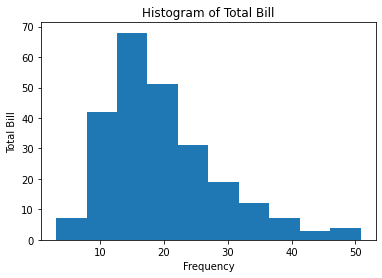

In [3]:
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(tips['total_bill'], bins=10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

#### 산점도 그래프 그리기
- scatter 메서드 사용, x축, y축 변수 전달
- 변수 2개 사용 : 이변량 그래프

Text(0, 0.5, 'Tip')

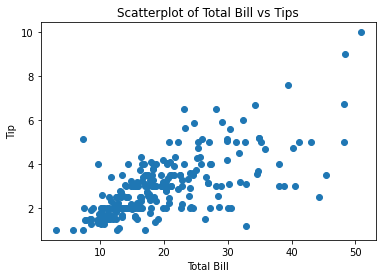

In [4]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs Tips')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

#### 박스 그래프 그리기
- 이산형 변수와 연속형 변수를 함께 사용하는 그래프
- 이산형 변수 : Female, male같이 명확히 구분되는 값
- 연속형 변수 : Tip과 같이 명확하게 셀 수 없는 범위의 값
- boxplot 메서드 이용

Text(0.5, 1.0, 'Boxplot of Tips by Sex')

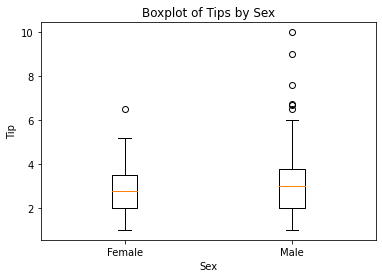

In [5]:
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1,1,1)
axes1.boxplot([tips[tips['sex']=='Female']['tip'], tips[tips['sex'] == 'Male']['tip']], labels=['Female', 'Male'])
axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')

In [6]:
tips[tips['sex']=='Female']['tip']
tips[tips['sex']=='Male']['tip'].sort_values(ascending=False)
# 동 떨어진것은 o로 나타내고 Tip 범주내(예. 2~4)에 연속되는 부분은 박스로 나타내나 봄

170    10.00
212     9.00
23      7.58
59      6.73
141     6.70
       ...  
43      1.32
75      1.25
235     1.25
237     1.17
236     1.00
Name: tip, Length: 157, dtype: float64

### 다변량 그래프 그리기
- 변수가 2개인건 이변량 그래프
- 변수가 3개 이상 사용해 그린 그래프는?  -> 다변량 그래프

#### 다변량 데이터로 다변량 그래프 그리기 - 산점도 그래프
- 앞서 그린 산점도에 성별을 추가해보자. 산점도 그래프를 색상으로 구분하면 괜찮을 듯.
- 색상을 추가하기 위해서는 문자열은 못 쓰고, 0,1 과 같은 정수를 사용해야함.

- 여성(Female)을 0으로, 남성(Male)이면 1을 반환하게 변환하자

In [7]:
def recode_sex(sex) :
    if sex == 'Female' :
        return 0
    else :
        return 1

In [8]:
# sex열에 recode_sex 함수를 브로드캐스팅하기 위해 apply 메서드를 이용한다.
# apply 메서드는 10장에서 추가적인 설명해준다고 함.
tips['sex_color'] = tips['sex'].apply(recode_sex)
tips # sex_color가 추가 됨

,total_bill,tip,sex,smoker,day,time,size,sex_color
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


- 테이블당 인원수도 추가해주자 ( 점의 size를 적용해주자 )

Text(0, 0.5, 'Tip')

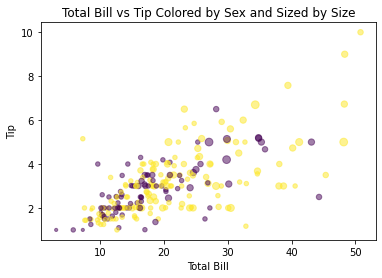

In [9]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(x=tips['total_bill'], y=tips['tip'], s=tips['size']*10, c=tips['sex_color'], alpha=0.5)
# s는 점의 크기(size), c는 점의 색상, alpha는 점의 투명도
axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

## 04 - 3. seaborn 라이브러리 자유자재로 사용하기
- seaborn 라이브러리를 활용하면 matplotlib 보다 좀 더 화려한 그래프를 그릴 수 있음
- seaborn 라이브러리는 matplotlib 라이브러리를 기반으로 만든 라이브러리임

In [10]:
import seaborn as sns
tips = sns.load_dataset('tips')

#### 단변량 그래프 그리기 - 히스토그램
- seaborn으로 히스토그램을 그리러면 subplots, distplot 메서드를 사용 함

Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

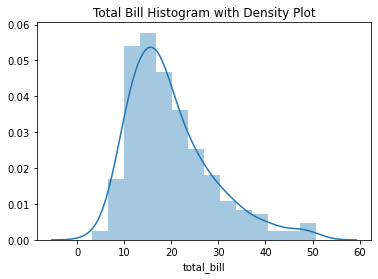

In [11]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot') # 밀도함수도 같이 그려줌
# 밀도함수 : 주어진 데이터를 정규화시켜 넓이가 1이 되도록 그린 그래프

Text(0, 0.5, 'Frequency')

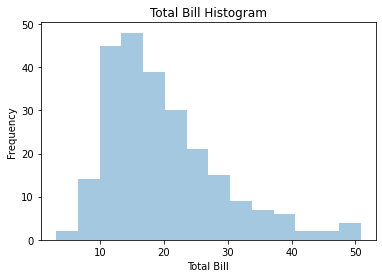

In [12]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde=False) # ked=False를 넣어주면 밀도함수는 안나옴
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Unit probability')

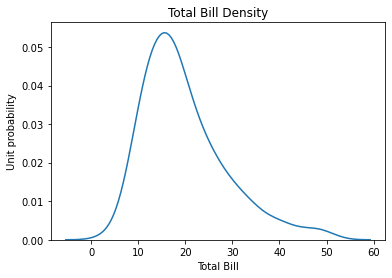

In [13]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], hist=False) #hist=False를 넣어주면 히스토그램은 안나옴
ax.set_title('Total Bill Density')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Unit probability')

##### 실무환경에서는 데이터 시각화를 더 효율적으로 하기 위해 여러 그래프를 한번에 출력하는 경우가 많다.
- distplot의 rug 인자를 추가해 양탄자(rug) 그래프를 그려봄
- 양탄자그래프는 그래프의 축에 동일한 길이의 직선을 붙여 데이터의 밀집 정도를 표현한 것



Text(0.5, 0, 'Total Bill')

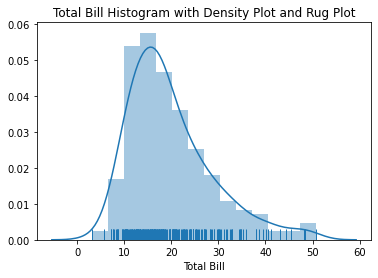

In [14]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug=True) # rug 넣어주기
ax.set_title('Total Bill Histogram with Density Plot and Rug Plot')
ax.set_xlabel('Total Bill')

#### count 그래프
- 이산값을 나타내는 그래프

Text(0, 0.5, 'Frequency')

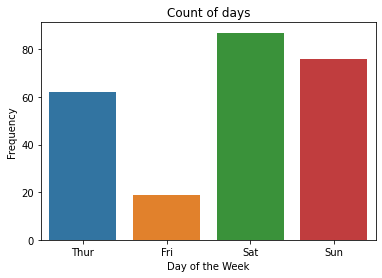

In [15]:
ax = plt.subplot()
ax = sns.countplot('day', data=tips)
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

#### seaborn 라이브러리로 산점도 그래프 그리기
- matplotlib보다 다양한 방법으로 산점도 그래프를 그릴 수 있다.
- regplot 메서드 사용. 산점도 그래프와 회귀선을 함께 그릴 수 있음
- 회귀선을 제거하려면 fit_reg인자를 False로 두면 됨.

Text(0, 0.5, 'Tip')

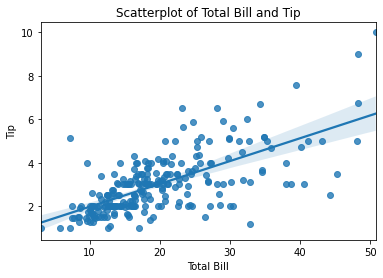

In [16]:
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Tip')

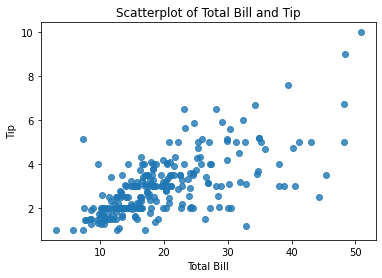

In [17]:
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=False)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

산점도와 히스토그램을 한번에 그려주는 jointplot 메서드를 이용해보자

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

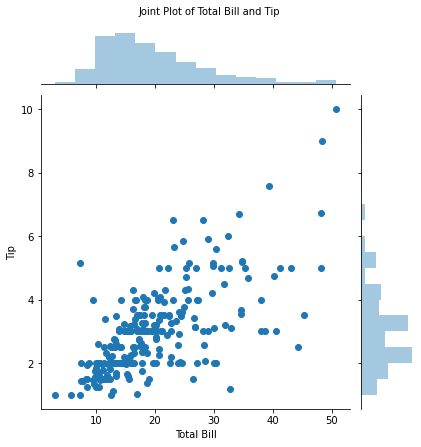

In [18]:
joint = sns.jointplot(x='total_bill',y='tip', data=tips)
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

##### 산점도에서 점이 많이 겹치면 보기 힘듦. 이때 점을 육각형(hexbin)으로 사용해서 바꿔줘 보자
- 겹치는 데이터가 많을 수록 색이 점점 진해짐
- jointplot 메서드를 그대로 사용하고, kind 인자를 hex로 해주면 됨

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

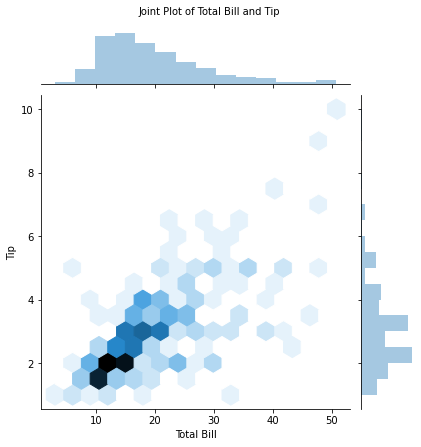

In [19]:
joint = sns.jointplot(x='total_bill',y='tip', data=tips, kind='hex')
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

#### 이차원 밀집도 그리기
- kdeplot 메서드로 만들 수 있음.
- shade=True를 주면 음영 효과를 낼수 있음

Text(0, 0.5, 'Tip')

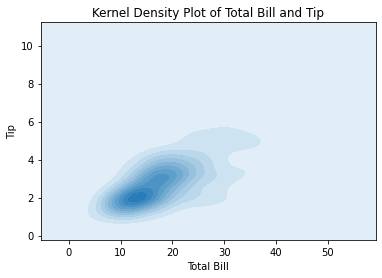

In [20]:
ax = plt.subplots()
ax = sns.kdeplot(data=tips['total_bill'],
                data2=tips['tip'],
                shade=True)
ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

#### 바 그래프 그리기
- 지정한 변수의 평균을 계산하여 그림
- barplot 메서드를 이용

Text(0, 0.5, 'Average total bill')

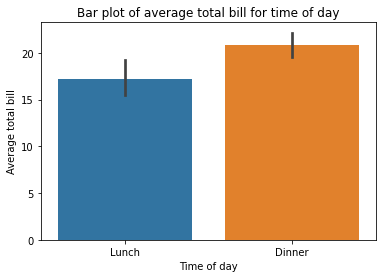

In [21]:
ax = plt.subplots()
ax = sns.barplot(x='time', y='total_bill', data=tips)
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')

#### 박스 그래프 그리기
- 최솟값, 1분위수, 중간값, 3분위수, 최댓값, 이상치 등 다양한 통계량을 한 번에 표현하는 그래프

Text(0, 0.5, 'Total Bill')

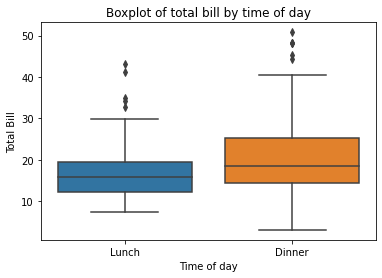

In [22]:
ax = plt.subplots()
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

##### 박스 그래프는 다양한 통계 수치를 확인하기 위해 자주 사용하는 그래프지만 데이터 분산이 모호하게 됨.
##### 이럴 경우, 박스 그래프에 커널 밀도를 추정한 바이올린 그래프를 사용하면 됨
- violinplot 메서드를 이용함

Text(0, 0.5, 'Total Bill')

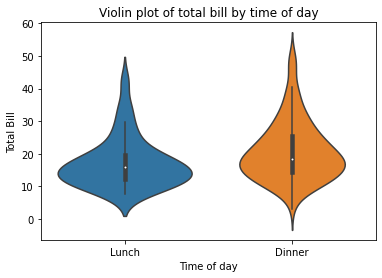

In [23]:
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('Violin plot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

#### 관계 그래프 그리기
- 지금까지 설명한 그래프를 종합한 그래프라 생각 하면 됨
- pairplot 메서드에 DF를 넣는 방법으로 간단하게 그릴 수 있음
- `단점` : 밑대각선으로 중복되는 그래프가 그려짐

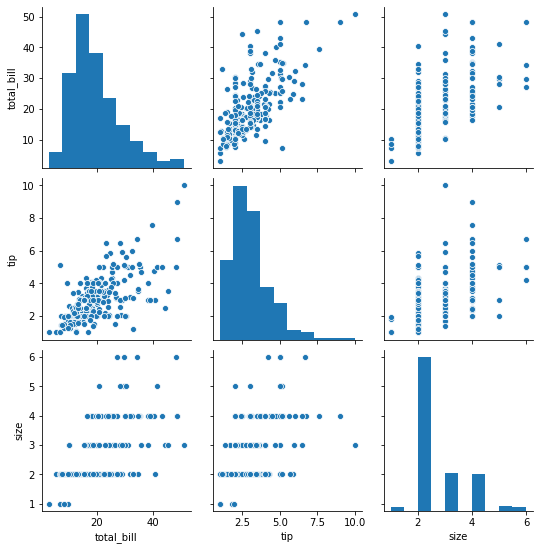

In [24]:
fig = sns.pairplot(tips)

##### 단점을 보완하기 위해서 
- map_upper : 대각선을 기준으로 위쪽에 그릴 그래프 지정
- map_lower : 대각선을 기준으로 아래쪽에 그릴 그래프 지정
- map_diag : 대각선을 중심으로 그래프를 그림

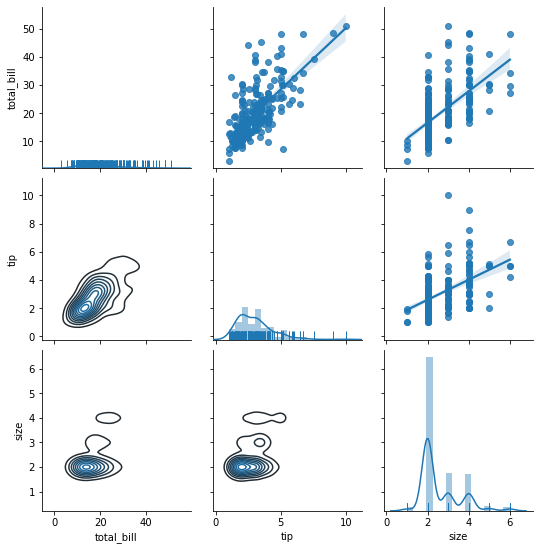

In [28]:
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug=True)
plt.show() # 위에는 산점도, 밑에는 이차원 밀집도, 가운데는 히스토그램, 밀집도

In [ ]:
#page = 105까지함